In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


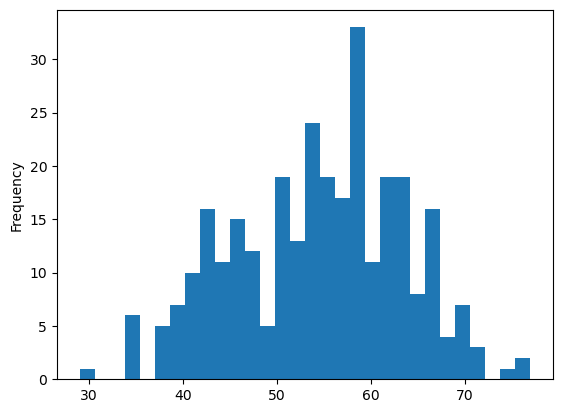

In [8]:
# create a histogram of age 
heart_disease["age"].plot.hist(bins = 30);

In [9]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


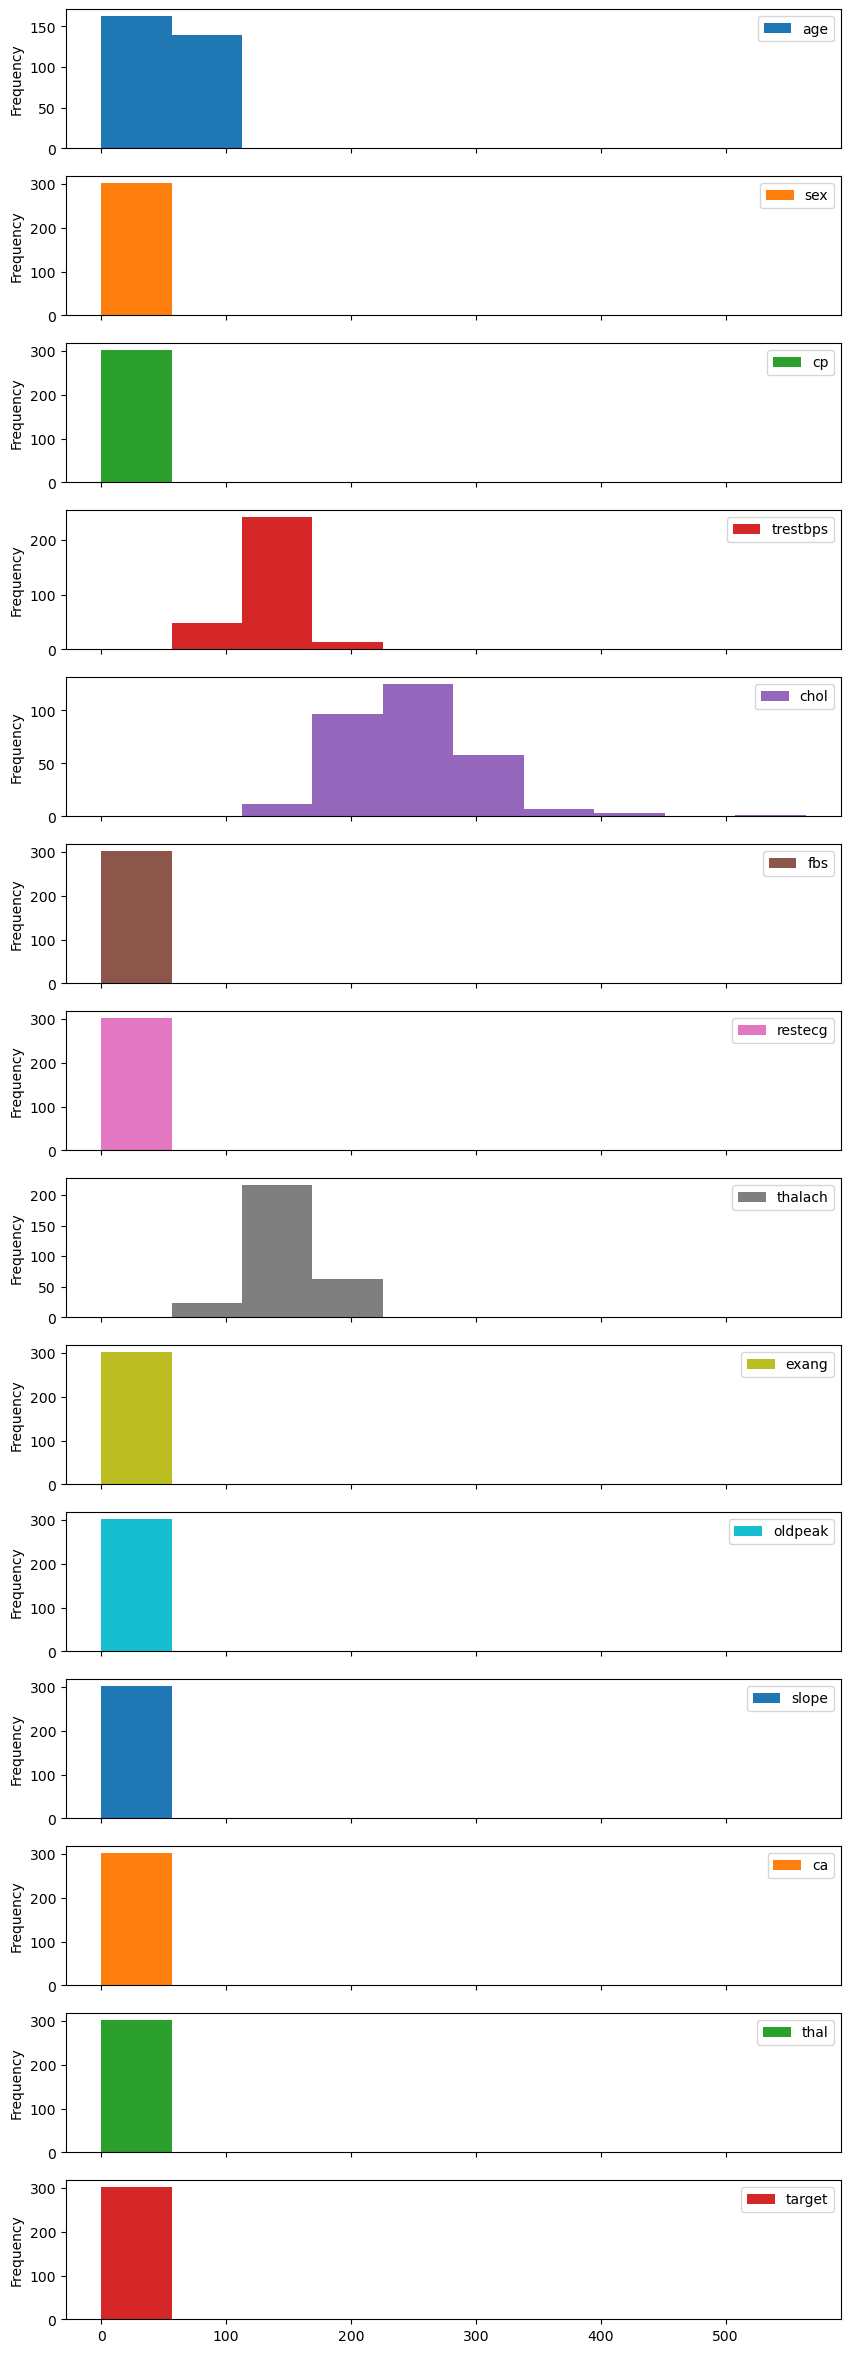

In [11]:
heart_disease.plot.hist(figsize = (10,30),subplots = True);

## 4. Plotting with pandas using the OO method
For more complicated plots, you'll want to use the OO method.

In [12]:
# Perform data analysis on patients over 50
over_50 = heart_disease[heart_disease["age"] > 50]
over_50

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


<Axes: xlabel='age', ylabel='chol'>

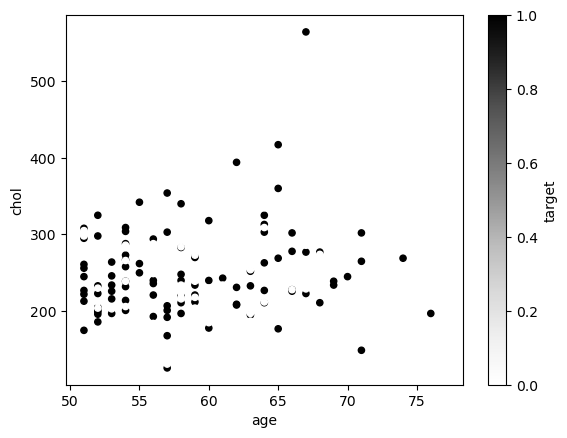

In [13]:
#pyplot method
over_50.plot(kind= 'scatter',
            x = 'age',
            y = 'chol',
            c= 'target')

(45.0, 100.0)

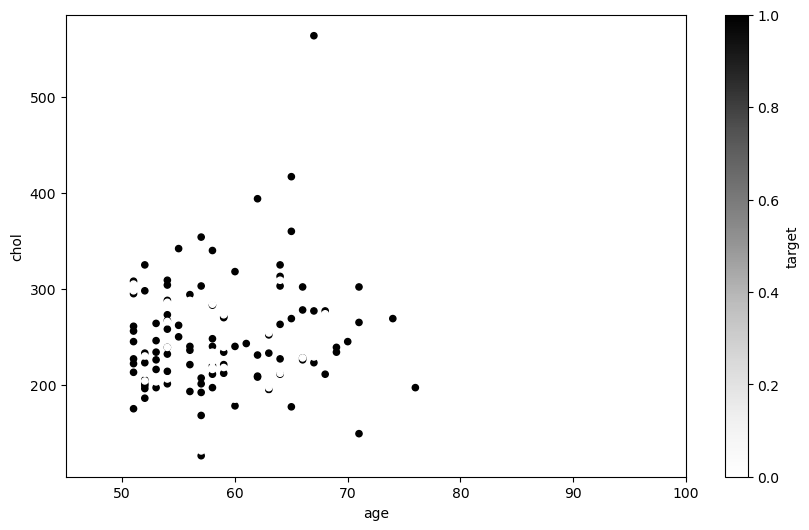

In [19]:
#OO method
fig ,ax = plt.subplots(figsize=(10 ,6))
over_50.plot(kind='scatter',
            x = 'age',
            y = 'chol',
            c = 'target',
            ax =ax)

ax.set_xlim([45,100])

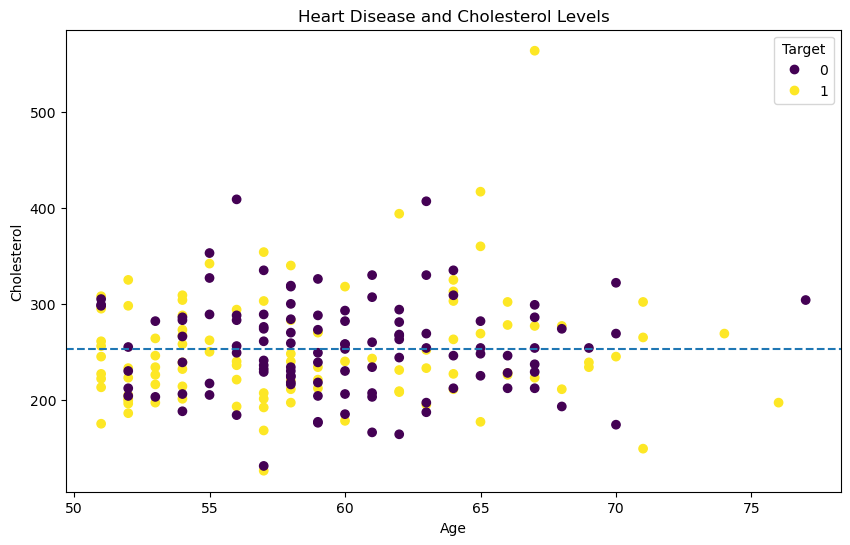

In [31]:
# Make a bit more of a complicated plot
fig , ax = plt.subplots(figsize=(10 ,6))

#plot the data
scatter = ax.scatter(x = over_50["age"],
                     y = over_50["chol"],
                     c = over_50["target"])

# customize the plot
ax.set(title="Heart Disease and Cholesterol Levels",
       xlabel="Age",
       ylabel="Cholesterol");

#add a legend
ax.legend(*scatter.legend_elements(), title="Target")

#add a horizontal line
ax.axhline(over_50["chol"].mean(), linestyle = '--' )

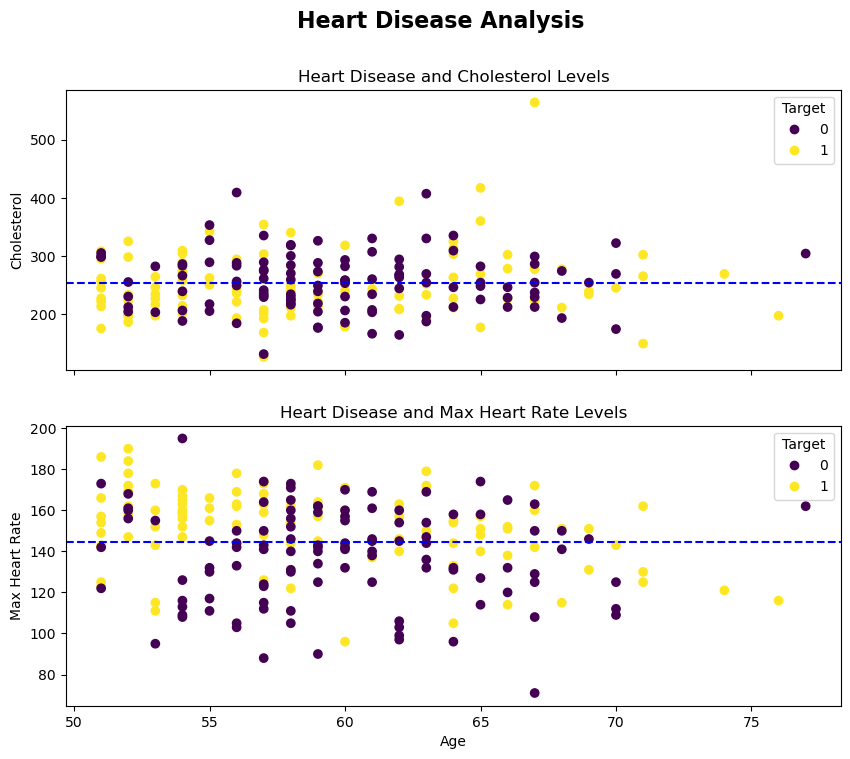

In [32]:
# Setup plot (2 rows, 1 column)
fig, (ax0, ax1) = plt.subplots(nrows=2, # 2 rows
                               ncols=1, 
                               sharex=True, 
                               figsize=(10, 8))

# Add data for ax0
scatter = ax0.scatter(over_50["age"], 
                      over_50["chol"], 
                      c=over_50["target"])
# Customize ax0
ax0.set(title="Heart Disease and Cholesterol Levels",
        ylabel="Cholesterol")
ax0.legend(*scatter.legend_elements(), title="Target")

# Setup a mean line
ax0.axhline(y=over_50["chol"].mean(), 
            color='b', 
            linestyle='--', 
            label="Average")


# Add data for ax1
scatter = ax1.scatter(over_50["age"], 
                      over_50["thalach"], 
                      c=over_50["target"])

# Customize ax1
ax1.set(title="Heart Disease and Max Heart Rate Levels",
        xlabel="Age",
        ylabel="Max Heart Rate")
ax1.legend(*scatter.legend_elements(), title="Target")

# Setup a mean line
ax1.axhline(y=over_50["thalach"].mean(), 
            color='b', 
            linestyle='--', 
            label="Average")

# Title the figure
fig.suptitle('Heart Disease Analysis', fontsize=16, fontweight='bold');

In [35]:
# differenet styles avilable
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [36]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [37]:
# Create x(features matrix)
X = heart_disease.drop("target" , axis = 1)

# Create y (labels)
y = heart_disease["target"]

In [39]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [40]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [41]:
# 2. Choose the right estimator/algorithm for our problems
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [42]:
# 3. fit the model to the traning data 
from sklearn.model_selection import train_test_split

X_train , x_test , y_train , y_test = train_test_split(X ,y , test_size=0.2)

In [43]:
clf.fit(X_train ,y_train)

RandomForestClassifier()

In [44]:
#make prediction
y_preds = clf.predict(x_test)
y_preds


array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1], dtype=int64)

In [45]:
y_test

275    0
244    0
221    0
268    0
63     1
      ..
78     1
269    0
262    0
69     1
200    0
Name: target, Length: 61, dtype: int64

In [46]:
# 4. Evaluate the model
clf.score(X_train , y_train)

1.0

In [47]:
clf.score(x_test , y_preds)

1.0

In [49]:
clf.score(x_test , y_test)

0.9180327868852459

In [50]:
from sklearn.metrics import classification_report , confusion_matrix, accuracy_score

print(classification_report(y_test , y_preds))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91        29
           1       0.91      0.94      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



In [51]:
confusion_matrix(y_test , y_preds)

array([[26,  3],
       [ 2, 30]], dtype=int64)

In [52]:
accuracy_score(y_test , y_preds)

0.9180327868852459

In [53]:
# 5 . improve model
# Try diffrenet amount of n_estimators

np.random.seed(42)
for i in range (10 ,100 ,10):
    print(f"Trying model with {i} estimators")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train ,y_train)
    print (f"Model accuracy on test set: {clf.score(x_test , y_test) *100:.2f}%")
    print("")

Trying model with 10 estimators
Model accuracy on test set: 90.16%

Trying model with 20 estimators
Model accuracy on test set: 81.97%

Trying model with 30 estimators
Model accuracy on test set: 88.52%

Trying model with 40 estimators
Model accuracy on test set: 88.52%

Trying model with 50 estimators
Model accuracy on test set: 86.89%

Trying model with 60 estimators
Model accuracy on test set: 90.16%

Trying model with 70 estimators
Model accuracy on test set: 88.52%

Trying model with 80 estimators
Model accuracy on test set: 85.25%

Trying model with 90 estimators
Model accuracy on test set: 91.80%



In [54]:
# 6. save a model and load it
import pickle

pickle.dump(clf , open("random_forest_model_1.pkl" , "wb"))

In [55]:
loaded_model = pickle.load(open("random_forest_model_1.pkl" , "rb"))
loaded_model.score(x_test , y_test)

0.9180327868852459